In [33]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image

np.set_printoptions(precision=2)

In [34]:
# Dont worry about why I choose it
my_random_state = 13

## Objective Function in CART

The objective function in CART's purpose is to maximize the information gain (IG) at each split. Loosely it is given by:

$$IG = (information\space before\space splitting) - (information\space  after\space splitting)$$

A more formal definition is given below

$$\huge IG(D_p,f)=I(D_p) - \sum_{j=1}^{m}\frac{N_j}{N}I(D_j)$$

where f is the feature to perform the split, and D_p and D_j are the datasets of the parent and jth child node, respectively. I is the impurity measure. N is the total number of samples, and N_j is the number of samples at the jth child node. 

Now, let's take a look at the most commonly used splitting criteria for classification (as described in CART). For simplicity, I will write the equations for the binary split, but of course it can be generalized for multiway splits. So, for a binary split we can compute IG as

$$\huge IG(D_p,f)=I(D_p) - \frac{N_{left}}{N}I(D_{left})- \frac{N_{right}}{N}I(D_{right})$$

## Information Criterion

Generally, your performance will not change whether you use Gini impurity or Entropy. 

<li>It only matters in 2% of the cases whether you use gini impurity or entropy. </li>
<li>Entropy might be a little slower to compute (because it makes use of the logarithm). </li>

### Gini

We are trying to explain how the numbers for gini came to be

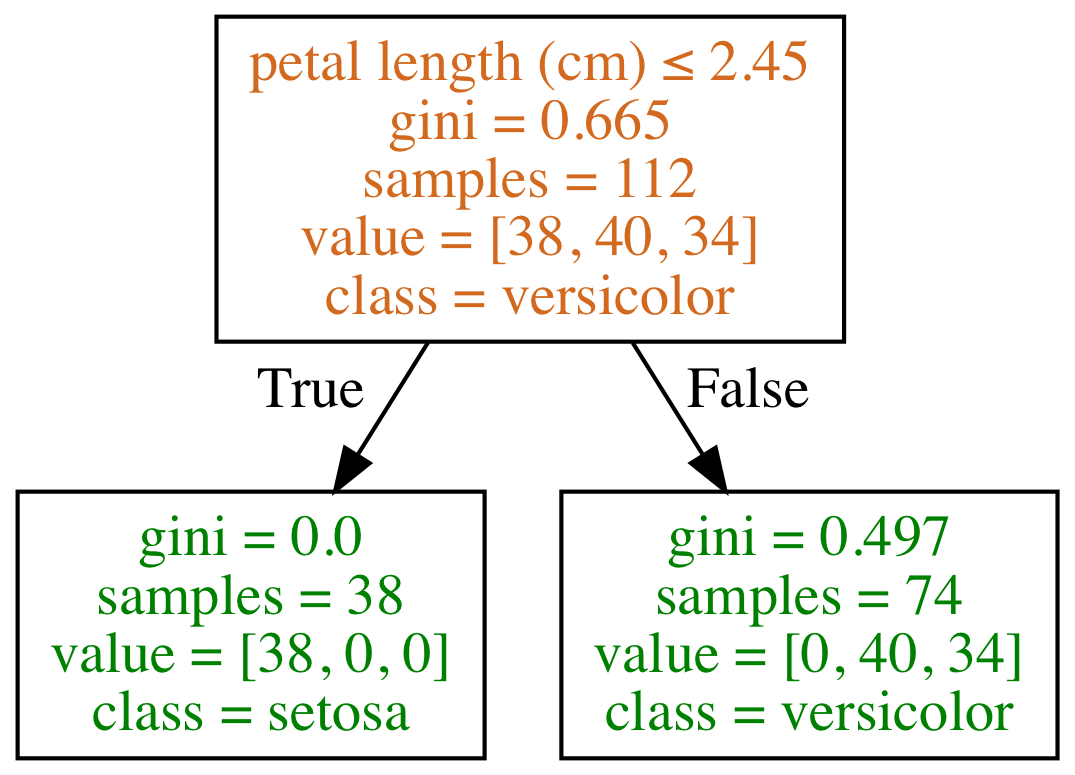

In [35]:
#PATH = !pwd
Image(filename ="../images/iris_depth1_gini_decisionTree.png")

The formula for information gain can be found below

$$\Huge I_G=1 - \sum_{j=1}^{c}p_{j}^{2}$$

## Gini for Parent

In [36]:
1 - ( (38.0/ 112)**2 + (40.0/ 112)**2 + (34.0/ 112)**2  )

0.6651785714285714

## Gini for Child Node (left)

In [37]:
1 - ( (38.0/ 38)**2 + (0.0/ 38)**2 + (0.0/ 38)**2  )

0.0

## Gini for Child Node (right)

In [38]:
1 - ( (0.0/ 74)**2 + (40.0/ 74)**2 + (34.0/ 74)**2  )

0.4967129291453616

## Information Gain

In [39]:
.665 - 0 - (74/ 112) * .497

0.33662500000000006

### Entropy 

We are trying to explain how the numbers for entropy came to be

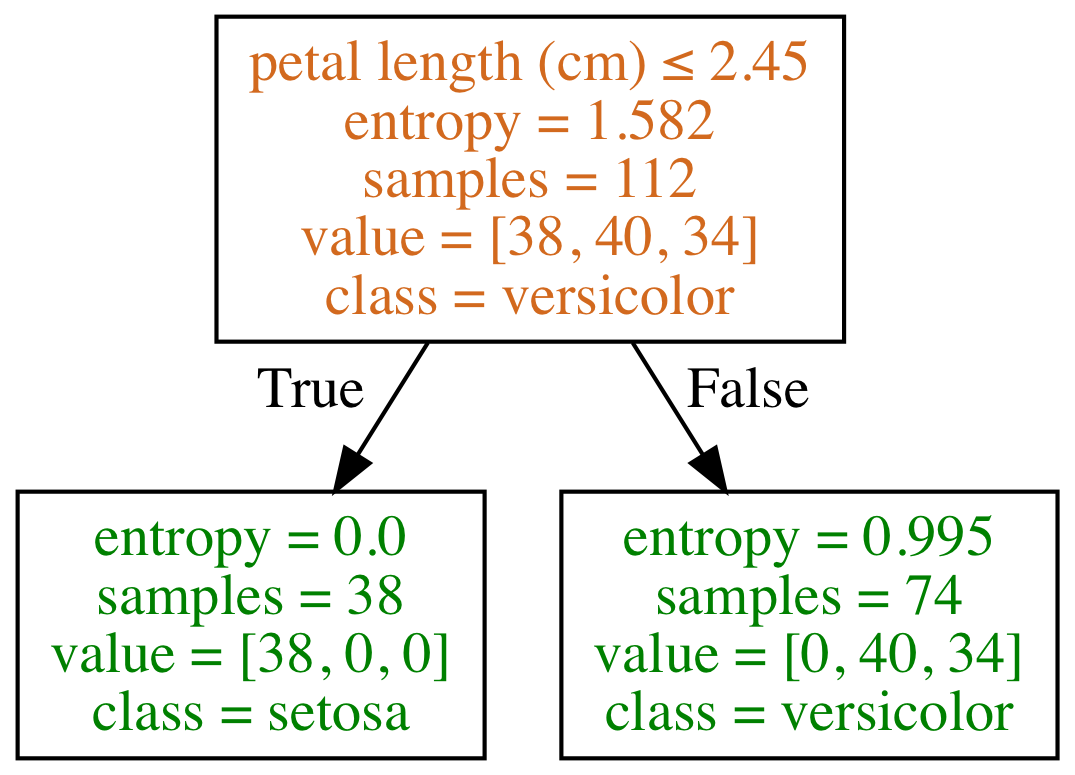

In [40]:
Image(filename = "../images/iris_depth1_entropy_decisionTree.png")

The formula for information entropy (for all non-empty classes) can be found below:

$$\Huge I_H=- \sum_{j=1}^{c}p_{j}log_{2}(p_j)$$

## Entropy for Parent

In [41]:
-1*( ((38.0/112)*np.log2(38.0/112))+((40.0/112)*np.log2(40.0/112))\
    +((34.0/112)*np.log2(34.0/112)) )

1.581711119299905

## Entropy for Child Node (left)

In [42]:
-1*( ((38.0/38)* np.log2(38.0/38)) )

-0.0

## Entropy for Child Node (right)

In [43]:
-1*( ((40.0/74)* np.log2(40.0/74)) + ((34.0/74)* np.log2(34.0/74)) )

0.9952525494396791

## Information Gain

In [44]:
1.5817 - 0 - (74/112) * .995

0.9242892857142858

# Bad Split (for blog purposes. Ignore this as it is gini not entropy)
petal length <= 3.6 

In [45]:
# Dont worry about why I choose it
my_random_state = 13

### Load Data

In [46]:
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)

# To simplify the decision tree, 
# I am restricting it to only one feature
df = df[['petal length (cm)']]

df['target'] = data.target

In [47]:
df.head(2)

,petal length (cm),target
0,1.4,0
1,1.4,0


#### Mimic Section from Decision Tree Anatomy
'Iris-setosa','Iris-versicolor','Iris-virginica'
<br/>Split Data into Training and Test Sets

In [48]:
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(df['petal length (cm)'],df['target'],random_state=my_random_state)

In [49]:
trainData = pd.concat([X_train, pd.DataFrame(y_train)], axis = 1)

In [50]:
splitFilter = trainData['petal length (cm)'] > 3.6 
trainData.loc[splitFilter, 'target'].value_counts(dropna = False)

1    35
2    34
Name: target, dtype: int64

#### Information for Parent

In [51]:
1 - ( (38.0/ 112)**2 + (40.0/ 112)**2 + (34.0/ 112)**2  )

0.6651785714285714

#### Information for Child Node (left)

In [52]:
1 - ( (38.0/ 43)**2 + (5.0/ 43)**2 + (0.0/ 43)**2  )

0.2055164954029205

#### Information for Child Node (right)

In [53]:
1 - ( (0.0/ 69)**2 + (35.0/ 69)**2 + (34.0/ 69)**2  )

0.4998949800462087

#### Information Gain (Gini Criterion)

In [54]:
.665 - (.206 + .500)

-0.040999999999999925

##### samples = 43, value = [38, 5, 0], class = setosa

### Entropy Information for Parent

In [55]:
-1*( ((38.0 / 112)* np.log2(38.0/112)) + ((40.0 / 112)* np.log2(40.0/112)) + ((34.0 / 112)* np.log2(34.0/112)) )

1.581711119299905

### Entropy Information for Child Node (left)

In [56]:
-1*( ((38.0 / 43.0)* np.log2(38.0/43.0)) + ((5.0 / 43.0)* np.log2(5.0/43.0)))

0.5185697317883058

### Entropy Information for Child Node (right)

In [57]:
-1*( ((35.0 / 69)* np.log2(35.0/69)) + ((34.0 / 69)* np.log2(34.0/69)) )

0.9998484829291058

### Information Gain (Entropy)

In [58]:
1.5817 - (.5186 + .9998)

0.06330000000000013

## Graphing Gini vs Entropy

Different impurity measures (Gini index and entropy) usually yield similar results. Thanks to [Data Science StackExchange](https://datascience.stackexchange.com/questions/10228/gini-impurity-vs-entropy#_=_) and [Sebastian Raschka](https://twitter.com/rasbt) for the inspiration for this graph.



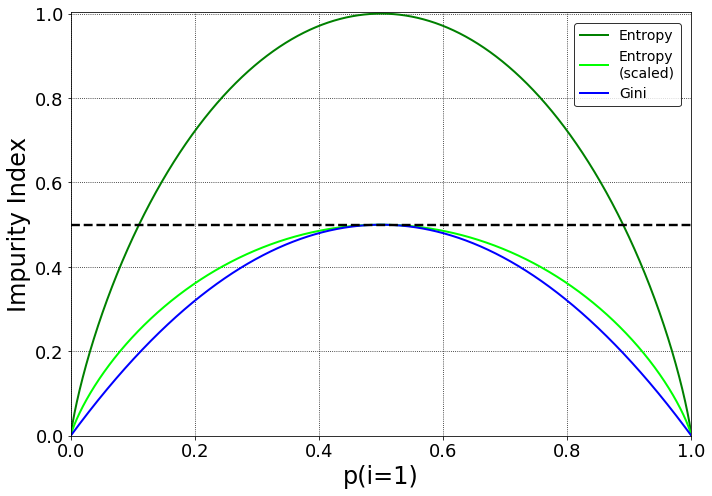

In [59]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.0001)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

for i, lab, ls, c, in zip([ent, sc_ent, gini(x)], 
                          ['Entropy', 'Entropy\n(scaled)', 
                           'Gini'],
                          ['-', '-', '-'],
                          ['green', 'lime', 'blue']):
    ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(fontsize = 14, edgecolor = 'k', bbox_to_anchor=(.8, 0.76))
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

ax.axhline(y=0.5, linewidth=2.4, color='k', linestyle='--')
#ax.axhline(y=1.0, linewidth=2.4, color='k', linestyle='--')
ax.set_ylim([0, 1.005])
ax.set_xlim([0, 1])
ax.tick_params(labelsize = 18)
ax.set_xlabel('p(i=1)', fontsize = 24)
ax.set_ylabel('Impurity Index', fontsize = 24)
fig.tight_layout()
fig.savefig('../images/entropy_vs_gini.png', dpi = 300)
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')